<a href="https://colab.research.google.com/github/haimin777/stylegan-encoder/blob/master/fuse_portraits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# !!! Very important to enable GPU in 'Runtime - Change runtime type- Python3 - GPU'

In [9]:
import os

#os.chdir('/content/drive/My Drive/AIgym/stylegan-encoder')
os.chdir('/content/drive/My Drive')
!mkdir fuse_portraits
os.chdir('fuse_portraits')
#clone repository
!git clone https://github.com/Puzer/stylegan-encoder.git
os.chdir('stylegan-encoder')
!mkdir raw_images aligned_images
os.chdir('raw_images')

!ls

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 105, done.
remote: Total 105 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (105/105), 10.39 MiB | 3.86 MiB/s, done.
Resolving deltas: 100% (28/28), done.
align_images.py   generate_figures.py			 requirements.txt
config.py	  Learn_direction_in_latent_space.ipynb  run_metrics.py
dataset_tool.py   LICENSE.txt				 teaser.png
dnnlib		  metrics				 training
encode_images.py  Play_with_latent_directions.ipynb	 train.py
encoder		  pretrained_example.py
ffhq_dataset	  README.md


In [15]:
#dowmload images for generate fuse portraits

!wget http://cdn2.estamosrodando.com/biografias/7/14/vin-diesel-751865.jpg
!wget https://i.pinimg.com/originals/b9/19/fa/b919fa4777f9fc2eea79a99b9bda1634.jpg  
print('images: ', '\n')  
!ls  

--2019-07-26 07:17:21--  http://cdn2.estamosrodando.com/biografias/7/14/vin-diesel-751865.jpg
Resolving cdn2.estamosrodando.com (cdn2.estamosrodando.com)... 90.161.33.100
Connecting to cdn2.estamosrodando.com (cdn2.estamosrodando.com)|90.161.33.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘vin-diesel-751865.jpg.1’

vin-diesel-751865.j     [ <=>                ] 880.81K  5.49MB/s    in 0.2s    

2019-07-26 07:17:22 (5.49 MB/s) - ‘vin-diesel-751865.jpg.1’ saved [901953]

--2019-07-26 07:17:24--  https://i.pinimg.com/originals/b9/19/fa/b919fa4777f9fc2eea79a99b9bda1634.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.57.19.52, 2606:4700::6812:fb0, 2606:4700::6812:eb0
Connecting to i.pinimg.com (i.pinimg.com)|23.57.19.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278125 (272K) [image/jpeg]
Saving to: ‘b919fa4777f9fc2eea79a99b9bda1634.jpg’

b919fa4777f9fc2eea7 100%[===================>] 271.61K 

In [19]:
#back to workdir
os.chdir('/content/drive/My Drive/fuse_portraits/stylegan-encoder')
!ls


aligned_images	  ffhq_dataset				 raw_images
align_images.py   generate_figures.py			 README.md
config.py	  Learn_direction_in_latent_space.ipynb  requirements.txt
dataset_tool.py   LICENSE.txt				 run_metrics.py
dnnlib		  metrics				 teaser.png
encode_images.py  Play_with_latent_directions.ipynb	 training
encoder		  pretrained_example.py			 train.py


In [0]:
import glob
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#preprocess raw images and save it to aligned_images
!python align_images.py raw_images/ aligned_images/


Using TensorFlow backend.
64045056/64040097 [==============================] - 5s 0us/step


In [22]:
#optimal iteration 500 - 800, 200 for example
!python encode_images.py aligned_images/ generated_images/ latent_representations/ --iterations 200


W0726 07:27:10.927349 139926475245440 deprecation_wrapper.py:119] From /content/drive/My Drive/fuse_portraits/stylegan-encoder/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W0726 07:27:10.928215 139926475245440 deprecation_wrapper.py:119] From /content/drive/My Drive/fuse_portraits/stylegan-encoder/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0726 07:27:10.928381 139926475245440 deprecation_wrapper.py:119] From /content/drive/My Drive/fuse_portraits/stylegan-encoder/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

Using TensorFlow backend.
W0726 07:27:10.990775 139926475245440 deprecation_wrapper.py:119] From /content/drive/My Drive/fuse_portraits/stylegan-encoder/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 0

In [28]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

W0726 07:33:36.871639 139749352822656 deprecation_wrapper.py:119] From /content/drive/My Drive/fuse_portraits/stylegan-encoder/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 07:33:36.874379 139749352822656 deprecation_wrapper.py:119] From /content/drive/My Drive/fuse_portraits/stylegan-encoder/dnnlib/tflib/tfutil.py:109: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W0726 07:33:40.716701 139749352822656 deprecation.py:323] From <string>:364: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

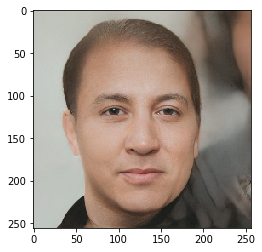

In [33]:
latents_path = glob.glob('/content/drive/My Drive/fuse_portraits/stylegan-encoder/latent_representations/*.npy')


latents = np.load(latents_path[0])
latents_d = np.load(latents_path[1])
latents+=latents_d
latents = latents/2
plt.imshow(generate_image(latents))


In [0]:
# Loading already learned representations
donald_trump = np.load(latents_path[0])
hillary_clinton = np.load(latents_path[1])



In [0]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')


# Smile transformation

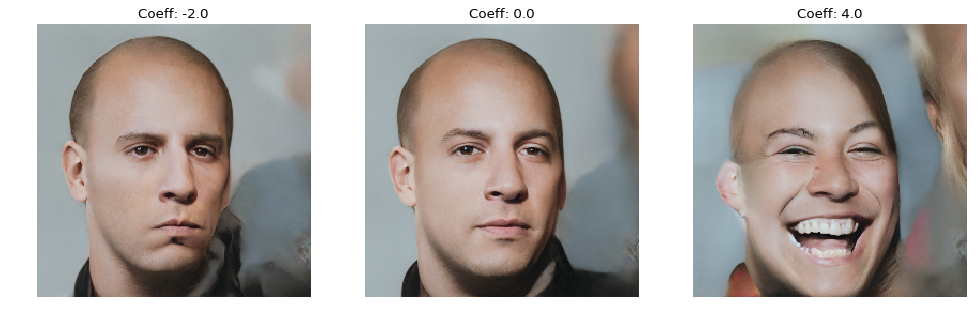

In [37]:
move_and_show(donald_trump, smile_direction, [-2, 0, 4])

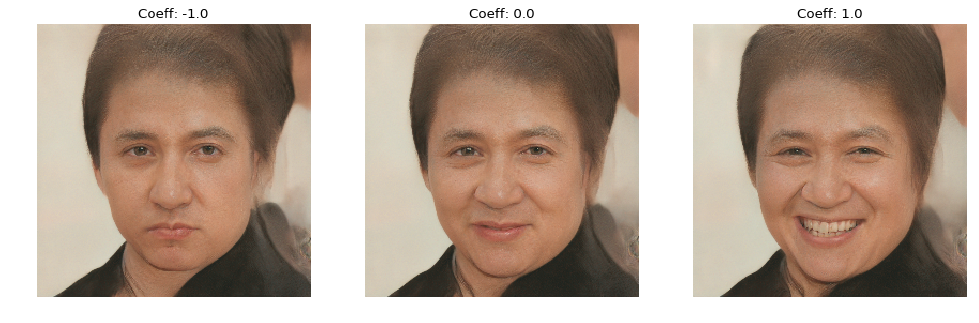

In [38]:
move_and_show(hillary_clinton, smile_direction, [-1, 0, 1])